# Analyzing UFO Sightings Data

## Setup

First we set some options for plot displays, then we import some of the packages we'll need for the analysis

In [74]:
# Make inline plots vector graphics instead of raster graphics
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'svg')

from plotnine import *

import seaborn
import pandas

ufo_sightings = pandas.read_csv("https://github.com/briandk/2020-virtual-program-in-data-science/raw/master/data/ufo_sightings.csv")

## Data Cleaning

Next we do a little bit of data cleanup. One of the problems with this dataset is that it reports midnight as "24:00", but the international standard for midnight is "00:00". The functions below clean the data by replacing instances of "24:00" with "00:00"

In [80]:
def clean_data(ufo_sightings: pandas.DataFrame):
    ufo_sightings['timestamp'] = ufo_sightings["date_time"].apply(lambda x: fix_24_hour_time(x))
#     ufo_sightings = ufo_sightings.set_index('timestamp')
    return ufo_sightings
    
def fix_24_hour_time(time: str):
    return pandas.to_datetime(time.replace("24:00", "00:00"))

ufo_sightings = clean_data(ufo_sightings)
ufo_sightings

,date_time,city_area,state,country,ufo_shape,encounter_length,described_encounter_length,description,date_documented,latitude,longitude,timestamp
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700.0,45 minutes,This event took place in early fall around 194...,4/27/2004,29.883056,-97.941111,1949-10-10 20:30:00
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200.0,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.384210,-98.581082,1949-10-10 21:00:00
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20.0,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.200000,-2.916667,1955-10-10 17:00:00
3,10/10/1956 21:00,edna,tx,us,circle,20.0,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.978333,-96.645833,1956-10-10 21:00:00
4,10/10/1960 20:00,kaneohe,hi,us,light,900.0,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.418056,-157.803611,1960-10-10 20:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
80327,9/9/2013 21:15,nashville,tn,us,light,600.0,10 minutes,Round from the distance/slowly changing colors...,9/30/2013,36.165833,-86.784444,2013-09-09 21:15:00
80328,9/9/2013 22:00,boise,id,us,circle,1200.0,20 minutes,Boise&#44 ID&#44 spherical&#44 20 min&#44 10 r...,9/30/2013,43.613611,-116.202500,2013-09-09 22:00:00
80329,9/9/2013 22:00,napa,ca,us,other,1200.0,hour,Napa UFO&#44,9/30/2013,38.297222,-122.284444,2013-09-09 22:00:00
80330,9/9/2013 22:20,vienna,va,us,circle,5.0,5 seconds,Saw a five gold lit cicular craft moving fastl...,9/30/2013,38.901111,-77.265556,2013-09-09 22:20:00


In [81]:
ufo_sightings['timestamp'].value_counts()

2010-07-04 22:00:00    36
2012-07-04 22:00:00    31
1999-11-16 19:00:00    27
2009-09-19 20:00:00    26
2011-07-04 22:00:00    25
                       ..
2004-08-07 23:00:00     1
1995-06-24 00:30:00     1
2000-07-27 20:13:00     1
2000-07-19 21:38:00     1
2000-06-23 22:40:00     1
Name: timestamp, Length: 69434, dtype: int64

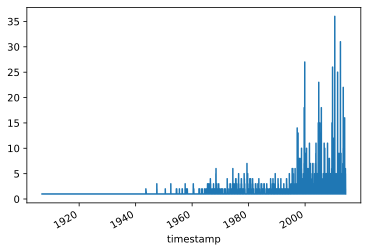

In [82]:
ufo_sightings.groupby('timestamp')['date_time'].agg('count').plot()

timestamp
1906-11-11 00:00:00    1
1910-01-01 00:00:00    1
1910-06-01 15:00:00    1
1916-04-05 13:00:00    1
1920-06-11 21:00:00    1
                      ..
2014-05-07 21:10:00    1
2014-05-07 21:20:00    1
2014-05-07 23:30:00    1
2014-05-08 00:00:00    1
2014-05-08 18:45:00    1
Name: date_time, Length: 69434, dtype: int64


/Users/briandk/opt/miniconda3/lib/python3.7/site-packages/plotnine/stats/stat_bin.py:93: PlotnineWarning: 'stat_bin()' using 'bins = 235'. Pick better value with 'binwidth'.


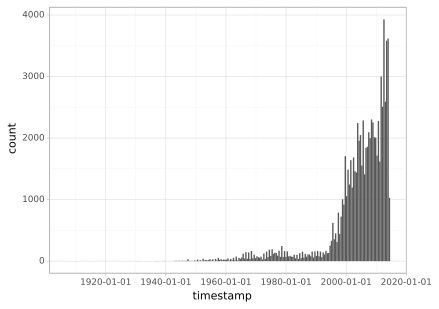

<ggplot: (8787466190233)>

In [88]:
(
    ggplot(
        aes(x = 'timestamp'),
        data = ufo_sightings
    ) +
    geom_histogram() +
    theme_light()
)

In [89]:
ufo_sightings.columns

Index(['date_time', 'city_area', 'state', 'country', 'ufo_shape',
       'encounter_length', 'described_encounter_length', 'description',
       'date_documented', 'latitude', 'longitude', 'timestamp'],
      dtype='object')

In [94]:
ufo_sightings[ufo_sightings['timestamp'] > "1980-01-01"]

,date_time,city_area,state,country,ufo_shape,encounter_length,described_encounter_length,description,date_documented,latitude,longitude,timestamp
32,10/10/1980 19:00,houston,tx,us,sphere,180.0,3 min,Sphere&#44 No lights&#44 moving through neigh...,4/16/2005,29.763056,-95.363056,1980-10-10 19:00:00
33,10/10/1980 22:00,dallas,tx,us,unknown,300.0,5 minutes,Strange shape shifting craft of pure light ene...,10/28/2002,32.783333,-96.800000,1980-10-10 22:00:00
34,10/10/1980 23:30,manchester,nh,us,light,300.0,3 to 5 min,A red glowing sphere stopped and watched me.,11/21/2010,42.995556,-71.455278,1980-10-10 23:30:00
35,10/10/1982 07:00,gisborne (new zealand),NaN,NaN,disk,120.0,2min,gisborne nz 1982 wainui beach to sponge bay,1/11/2002,-38.662334,178.017649,1982-10-10 07:00:00
36,10/10/1984 05:00,houston,tx,us,circle,60.0,1 minute,2 experience with unkown,4/18/2012,29.763056,-95.363056,1984-10-10 05:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
80327,9/9/2013 21:15,nashville,tn,us,light,600.0,10 minutes,Round from the distance/slowly changing colors...,9/30/2013,36.165833,-86.784444,2013-09-09 21:15:00
80328,9/9/2013 22:00,boise,id,us,circle,1200.0,20 minutes,Boise&#44 ID&#44 spherical&#44 20 min&#44 10 r...,9/30/2013,43.613611,-116.202500,2013-09-09 22:00:00
80329,9/9/2013 22:00,napa,ca,us,other,1200.0,hour,Napa UFO&#44,9/30/2013,38.297222,-122.284444,2013-09-09 22:00:00
80330,9/9/2013 22:20,vienna,va,us,circle,5.0,5 seconds,Saw a five gold lit cicular craft moving fastl...,9/30/2013,38.901111,-77.265556,2013-09-09 22:20:00


/Users/briandk/opt/miniconda3/lib/python3.7/site-packages/plotnine/stats/stat_bin.py:93: PlotnineWarning: 'stat_bin()' using 'bins = 81'. Pick better value with 'binwidth'.


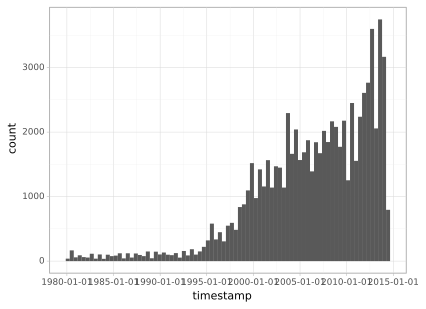

<ggplot: (8787466666445)>

In [95]:
(
    ggplot(
        aes(x = 'timestamp'),
        data = ufo_sightings[ufo_sightings['timestamp'] > "1980-01-01"]
    ) +
    geom_histogram() +
    theme_light() 
)